In [2]:
import numpy as np
import math as m
import cmath as cm
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
import spicy


In [10]:
# DATA
V_cutin = 3
V_rated = 12
Nnom = 22.5
Pnom = 4*10**6
k = Pnom/Nnom**3
N_min = (Nnom/V_rated)*V_cutin

# GENERATOR
p = 52/2
Rg = 14.821*10**-3
Lg = 5.573*10**-3
psi = 15.826

def generator(N, p, Rg, Lg, psi, case):

    fs = N*p/60
    omega = 2*np.pi*fs

    Pmech = k*N**3

    Zg = Rg + 1j*omega*Lg

    Ea = omega*psi
    
    if case=="a":

        # Polynonmial equation
        p = [0]*5
        p[0] = (3*abs(omega*Lg))**2
        p[1] = 0
        p[2] = - (3*abs(Ea))**2
        p[3] = 0
        p[4] = Pmech**2
        roots = np.roots(p)
        #print("roots : ", roots)
        
        Ia=roots[-1]

        Va = Pmech/(3*Ia) - Rg*Ia
        
        angle = np.arccos((Va+Rg*Ia)/Ea)*180/np.pi

    if case=="b":

        Ia = Pmech/(3*Ea)

        Va = Ea - Ia*Zg

        angle = - np.angle(Va,deg=True)

        Ia = cm.rect(Ia,angle*np.pi/180)

    Ea = cm.rect(Ea,angle*np.pi/180)
    Va = cm.rect(abs(Va),0)

    Sa = 3*Va*Ia
    Pa = Sa.real
    Qa = -Sa.imag
    
    Ploss = Pmech - Pa
    efficiency = Pa/Pmech

    # print('Sa = ', Sa, abs(Sa),np.angle(Sa,deg=True))
    # print('Ia = ', Ia, abs(Ia),np.angle(Ia,deg=True))
    # print('Va = ', Va, abs(Va),np.angle(Va,deg=True))
    # print('Zg = ',Zg, abs(Zg), np.angle(Zg,deg=True))
    # print('Ea = ',Ea, abs(Ea), np.angle(Ea,deg=True))

    return([fs,omega,Pmech,Zg,Ia,Va,Ea,angle,Sa,Pa,Qa,Ploss,efficiency])

case_a = generator(Nnom, p, Rg, Lg, psi, "a")
print(case_a)
case_b = generator(Nnom, p, Rg, Lg, psi, "b")



[9.75, 61.261056745000964, 4000000.0, (0.014821+0.3414078692398904j), 1740.4510418034213, (740.2897159140631+0j), (766.0849408046316+594.2036816984537j), 37.79847254686427, (3865314.02189697+0j), 3865314.02189697, -0.0, 134685.97810303, 0.9663285054742425]


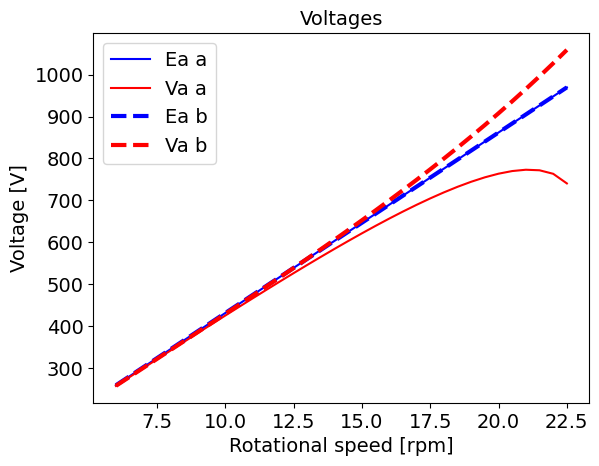

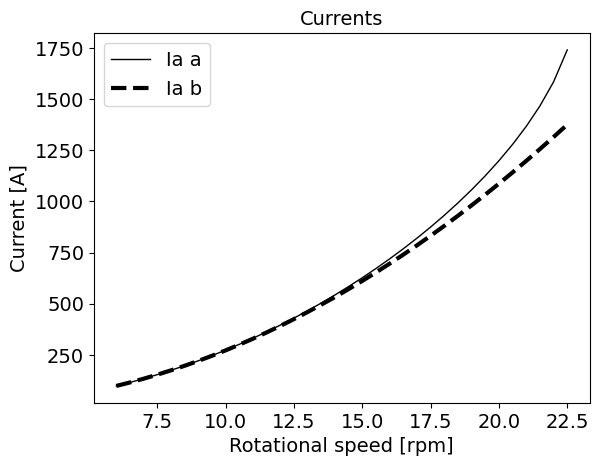

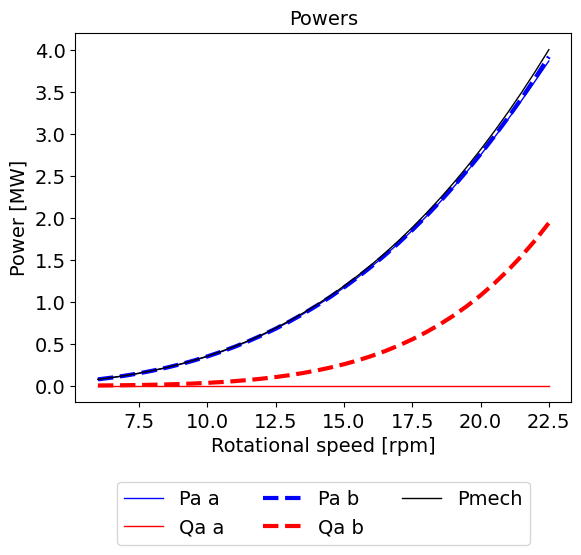

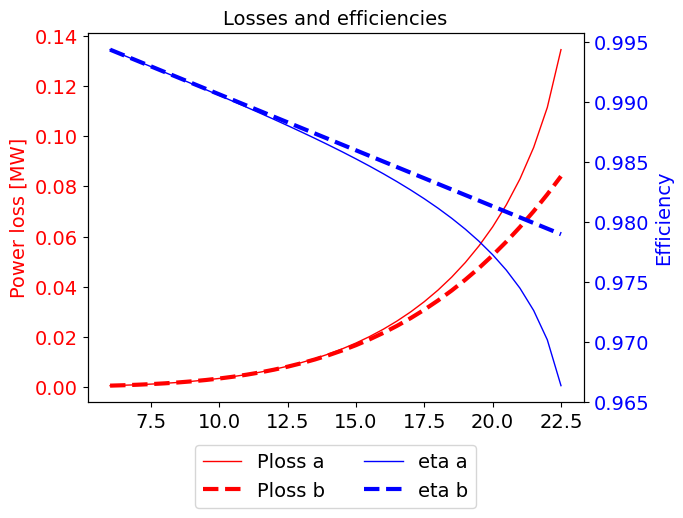

In [49]:
list_N = np.arange(np.ceil(N_min),23,0.5)

data_a = []
data_b = []
for N in list_N :
    data_a.append([N]+generator(N, p, Rg, Lg, psi, "a"))
    data_b.append([N]+generator(N, p, Rg, Lg, psi, "b"))


#Data_a = pd.DataFrame(data_a, columns=[fs,omega,Pmech,Zg,Ia,Va,Ea,angle,Sa,Pa,Qa,Ploss,efficiency])
#Data_b = pd.DataFrame(data_b, columns=[fs,omega,Pmech,Zg,Ia,Va,Ea,angle,Sa,Pa,Qa,Ploss,efficiency])

Data_a = pd.DataFrame(data_a, columns=['N','fs','omega','Pmech','Zg','Ia','Va','Ea','angle','Sa','Pa','Qa','Ploss','efficiency'])
Data_b = pd.DataFrame(data_b, columns=['N','fs','omega','Pmech','Zg','Ia','Va','Ea','angle','Sa','Pa','Qa','Ploss','efficiency'])

plt.rcParams.update({'font.size': 14})

plt.figure(1) 
plt.plot(Data_a['N'], abs(Data_a["Ea"]), zorder=1, color='b', linestyle='solid', label="Ea a")
plt.plot(Data_a['N'], abs(Data_a["Va"]), zorder=1, color='r', linestyle='solid', label="Va a")
plt.plot(Data_b['N'], abs(Data_b["Ea"]), zorder=2, color='b', linewidth=3,linestyle='dashed', label="Ea b")
plt.plot(Data_b['N'], abs(Data_b["Va"]), zorder=2, color='r', linewidth=3,linestyle='dashed', label="Va b")
plt.legend()
plt.title('Voltages')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Voltage [V]')
plt.show()
    
plt.figure(2) 
plt.plot(Data_a['N'], abs(Data_a["Ia"]), zorder=1, color='k', linewidth=1, linestyle='solid',  label="Ia a")
plt.plot(Data_b['N'], abs(Data_b["Ia"]), zorder=1, color='k', linewidth=3, linestyle='dashed', label="Ia b")
plt.legend()
plt.title('Currents')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Current [A]')
plt.show()

fig, ax = plt.subplots()
ax.plot(Data_a['N'], Data_a["Pa"]     /10**6,    linewidth=1, color='b', linestyle='solid', label="Pa a")
ax.plot(Data_a['N'], abs(Data_a["Qa"])/10**6,    linewidth=1, color='r', linestyle='solid', label="Qa a")
ax.plot(Data_b['N'], Data_b["Pa"]     /10**6,    linewidth=3, color='b', linestyle='dashed', label="Pa b")
ax.plot(Data_b['N'], abs(Data_b["Qa"])/10**6,    linewidth=3, color='r', linestyle='dashed', label="Qa b")
ax.plot(Data_a['N'], Data_a["Pmech"]  /10**6,    linewidth=1, color='k', linestyle='solid', label="Pmech")
legend = ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=3)
ax.set_title('Powers')
ax.set_xlabel('Rotational speed [rpm]')
ax.set_ylabel('Power [MW]')



fig, ax1 = plt.subplots()
ax1.plot(Data_a['N'], Data_a["Ploss"]/10**6, linewidth=1, color='r', linestyle='solid', label="Ploss a")
ax1.plot(Data_b['N'], Data_b["Ploss"]/10**6, linewidth=3, color='r', linestyle='dashed', label="Ploss b")
ax1.set_ylabel('Power loss [MW]', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(Data_a['N'], Data_a["efficiency"], linewidth=1, color='b', linestyle='solid', label="eta a")
ax2.plot(Data_b['N'], Data_b["efficiency"], linewidth=3, color='b', linestyle='dashed', label="eta b")
ax2.set_ylabel('Efficiency', color='b')
ax2.tick_params(axis='y', labelcolor='b')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax1.set_title('Losses and efficiencies')

plt.show()

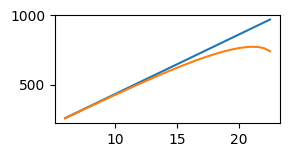

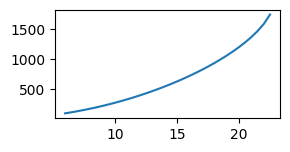

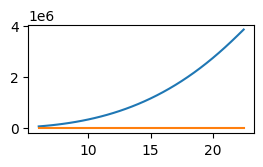

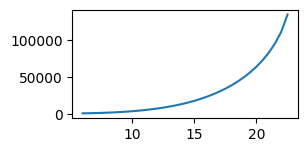

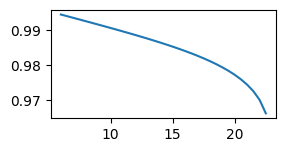